### Evaluation notebook for trained and saved models

In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=''
import numpy as np
import torch
from torch import nn
from mapsgan import cLRSolver, cVAESolver , BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
from pathlib import Path
import os, glob
import matplotlib.pyplot as plt
from mapsgan.utils import smooth_data

env: CUDA_VISIBLE_DEVICES=''


In [2]:
torch.cuda.is_available()

False

### Set these manually according to the script

In [48]:
# can directly copy-paste from the script
mode = 'clr'
fileprefix = '/hyp/hyp_bicy'
lr_gen = 1e-3
lr_dis = 1e-3

In [49]:
root_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
filesearch = root_path + '/models' + fileprefix + '*5000*' # can change here acc to saved epoch
filelist = glob.glob(filesearch)
filelist

['/home/yy/ADL4CV/mapsgan/models/hyp/hyp_bicy_1_20190204-210323_epoch_5000',
 '/home/yy/ADL4CV/mapsgan/models/hyp/hyp_bicy_0_20190204-201812_epoch_5000',
 '/home/yy/ADL4CV/mapsgan/models/hyp/hyp_bicy_2_20190204-215437_epoch_5000']

In [59]:
filename=filelist[2]
filename

'/home/yy/ADL4CV/mapsgan/models/hyp/hyp_bicy_2_20190204-215437_epoch_5000'

### Initializing dataloader, models, solver

In [6]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.train_dir,
                                  shuffle=True)
_ , testloader = data_loader(in_len=8, out_len=12, batch_size=1, num_workers=1, path=experiment.test_dir,
                                  shuffle=False)

In [51]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode=mode)
discriminator = ToyDiscriminator()

In [52]:
if mode == 'clr':
    solver = cLRSolver(generator, discriminator, 
                optims_args={'generator': {'lr': lr_gen}, 'discriminator': {'lr': lr_dis}})
elif mode == 'cvae':
    solver = cVAESolver(generator, discriminator, 
                optims_args={'generator': {'lr': lr_gen}, 'discriminator': {'lr': lr_dis}})

### Looking at losses

In [60]:
solver.load_checkpoint(filename)

5000

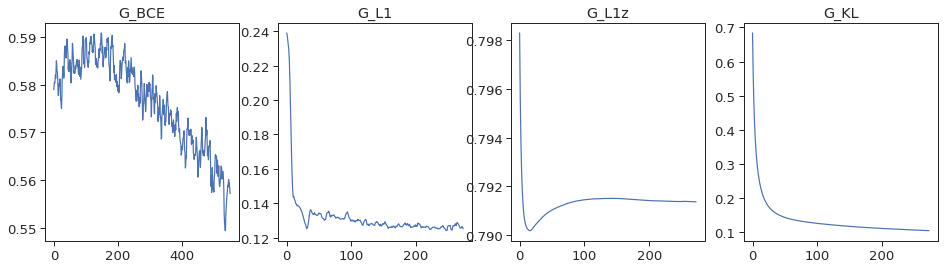

In [61]:
vis = Visualization()
vis.loss_val(solver.train_loss_history['validation']['generator'])

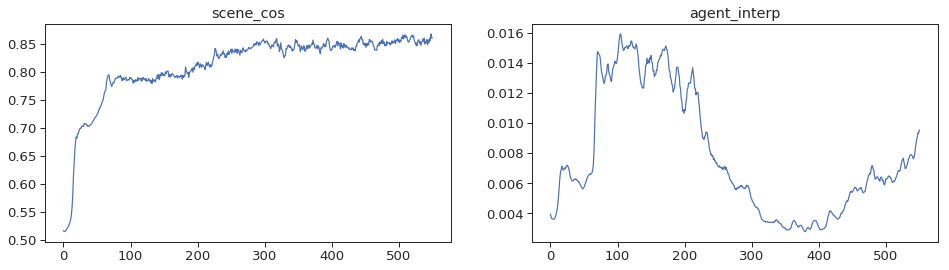

In [55]:
vis.loss_val(solver.train_loss_history['validation']['diversity'])

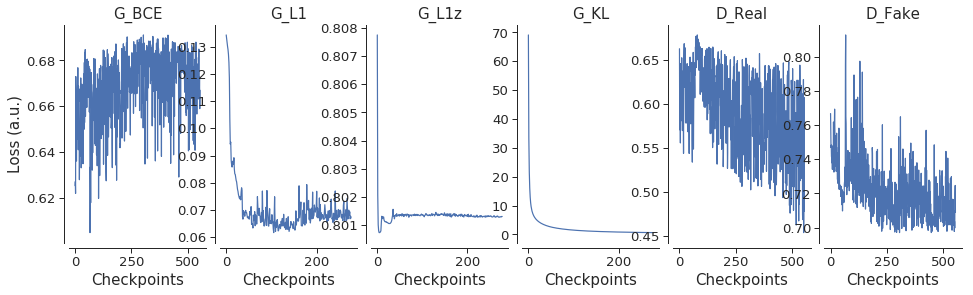

In [41]:
vis.loss(solver.train_loss_history)

### Looking at predictions

In [42]:
vis = Visualization()

### Interpolation

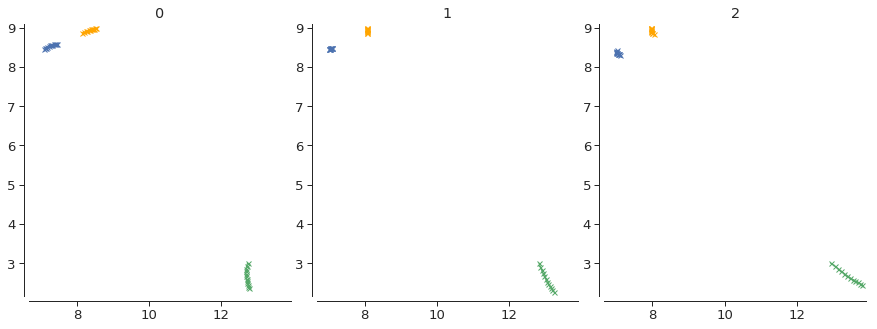

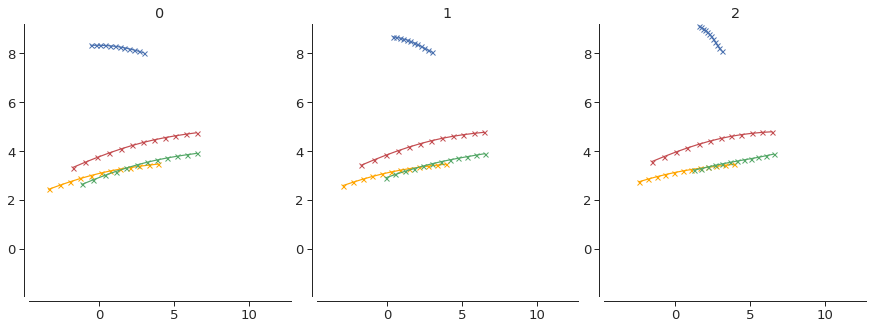

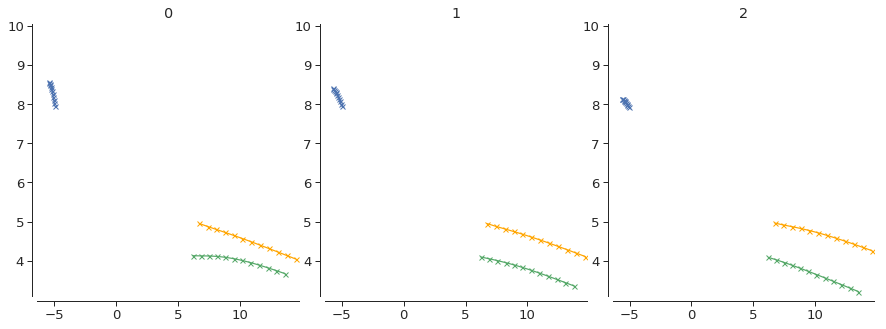

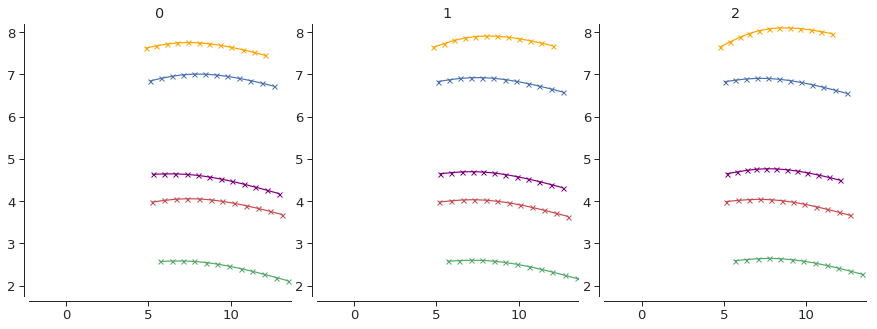

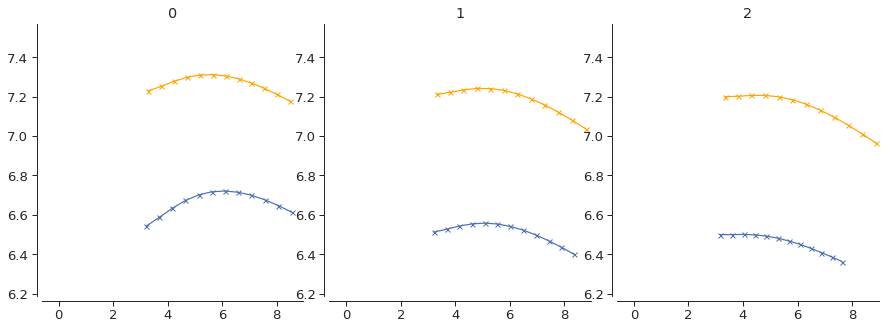

In [43]:
for s in [3,25,30,44,65]:
    out = solver.interpolate(testloader, scene=s, seed=10, stepsize=0.8)
    vis.trajectories(out, scenes = None)
    plt.show()

### Distribution

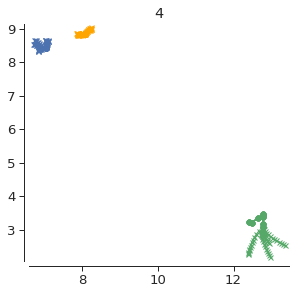

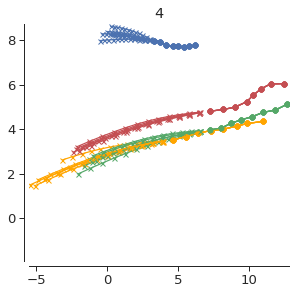

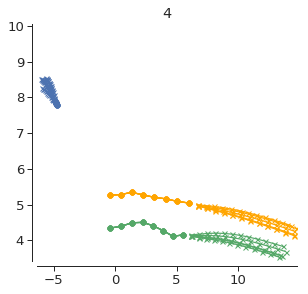

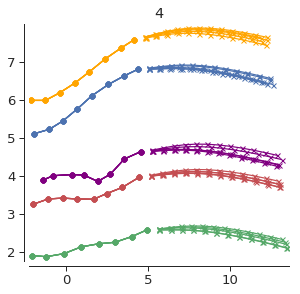

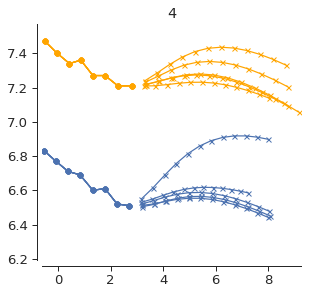

In [44]:
for s in [3,25,30,44,65]:
    predictions = solver.sample_distribution(testloader, scene=s, seed=10, z_dim=8, num_samples=5)
    vis.trajectories(predictions, scenes=None, input_truth=True, dist=True )
    plt.show()

### Test results

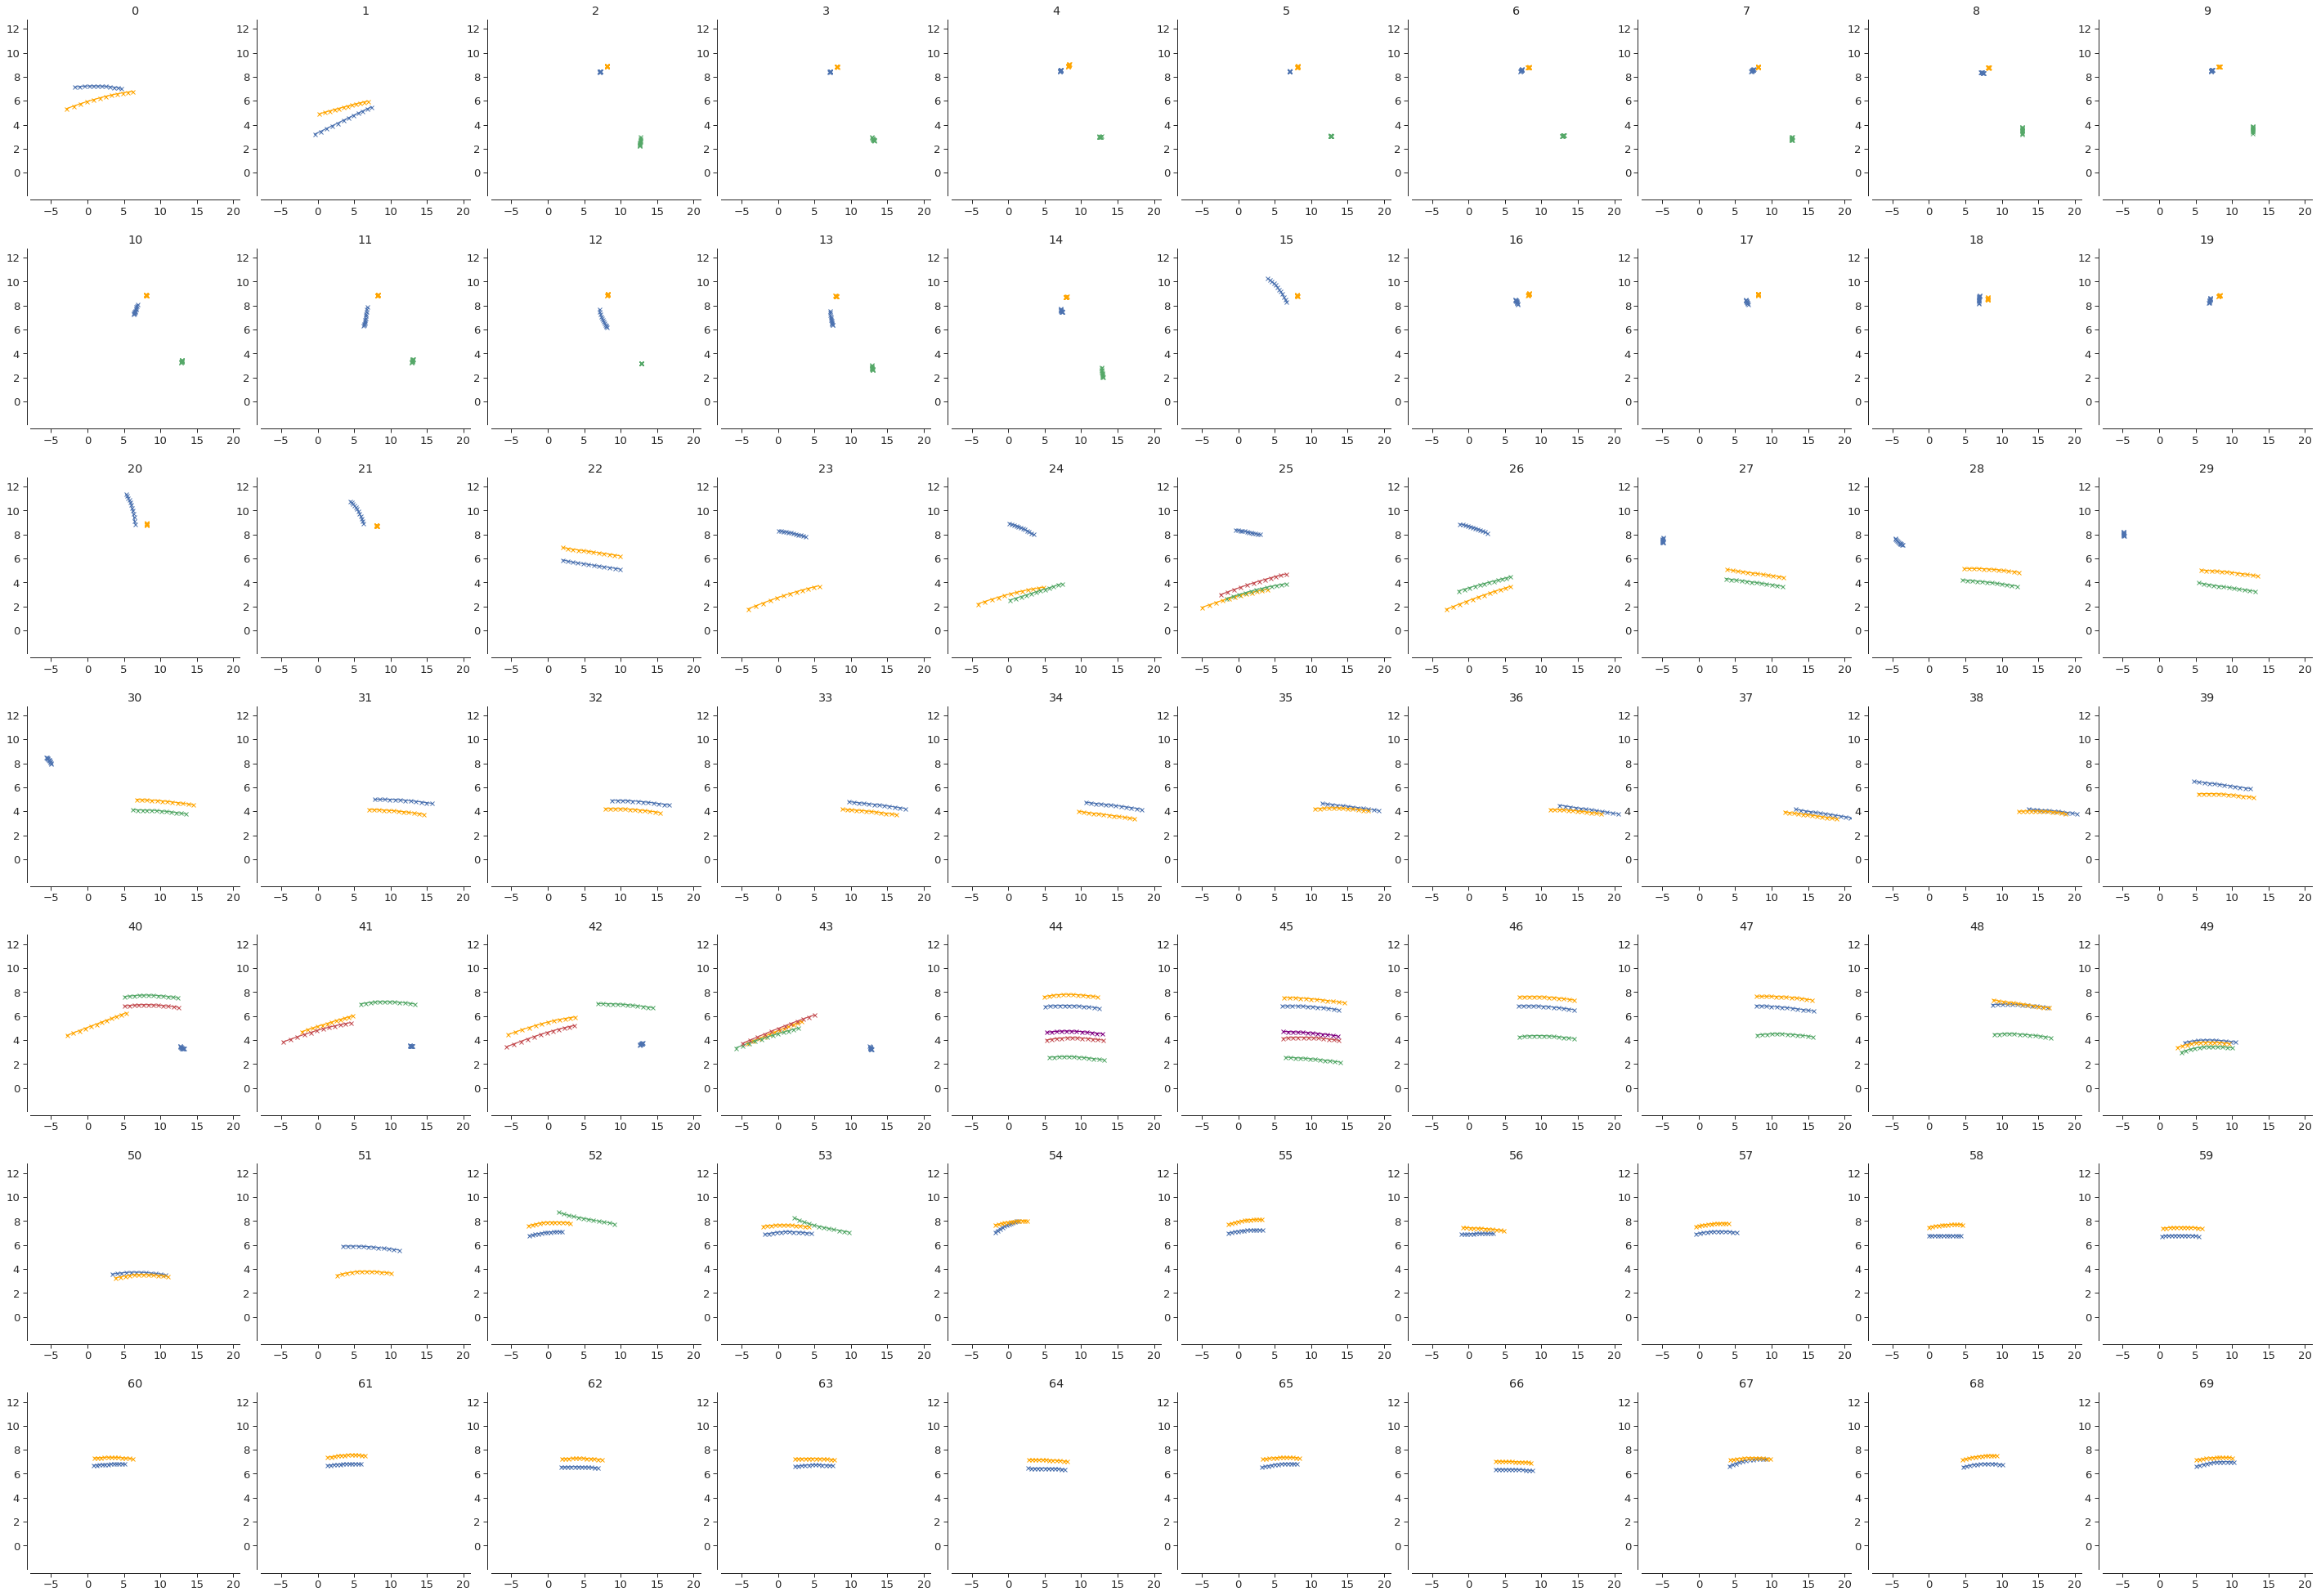

In [25]:
output = solver.test(testloader)
vis.trajectories(output, scenes=None)